<a href="https://colab.research.google.com/github/jaskiratkalra26/zomato-stock-prediction/blob/main/zomato_stock_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
df = pd.read_csv('zomato.csv')
df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-07-23,116.000000,138.899994,115.000000,126.000000,126.000000,694895290
1,2021-07-26,126.349998,143.750000,125.300003,140.649994,140.649994,249723854
2,2021-07-27,141.699997,147.800003,127.750000,132.899994,132.899994,240341900
3,2021-07-28,131.000000,135.000000,123.550003,131.199997,131.199997,159793731
4,2021-07-29,134.949997,144.000000,132.199997,141.550003,141.550003,117973089


<Axes: ylabel='Close'>

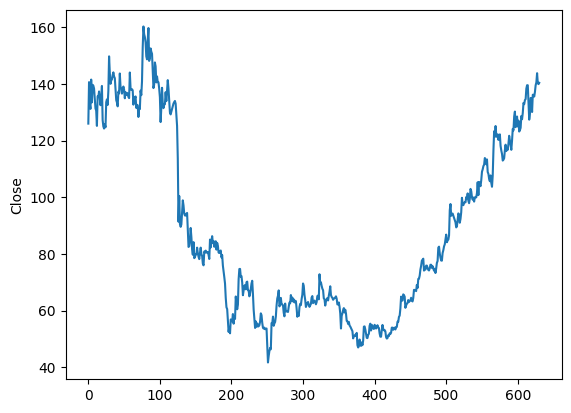

In [32]:
sns.lineplot(df['Close'])

<Axes: ylabel='Volume'>

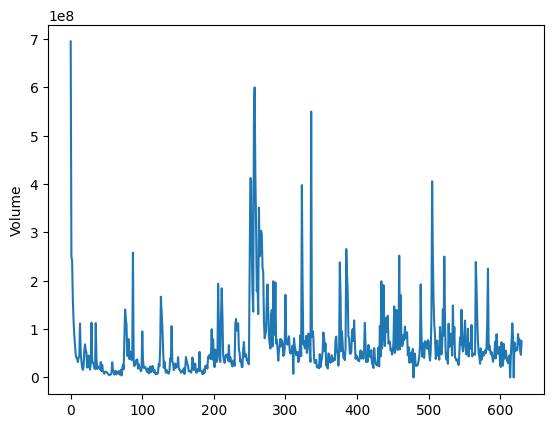

In [33]:
sns.lineplot(df['Volume'])

In [10]:
df = df.drop(['Date','Adj Close'],axis=1)
df.head(5)

,Open,High,Low,Close,Volume
0,116.000000,138.899994,115.000000,126.000000,694895290
1,126.349998,143.750000,125.300003,140.649994,249723854
2,141.699997,147.800003,127.750000,132.899994,240341900
3,131.000000,135.000000,123.550003,131.199997,159793731
4,134.949997,144.000000,132.199997,141.550003,117973089


In [11]:
df.isna().sum()

,0
Open,0
High,0
Low,0
Close,0
Volume,0


In [12]:
df['Y'] = np.where(df['Close'].shift(-1)>df['Close'],1,0)
df.head(5)

,Open,High,Low,Close,Volume,Y
0,116.000000,138.899994,115.000000,126.000000,694895290,1
1,126.349998,143.750000,125.300003,140.649994,249723854,0
2,141.699997,147.800003,127.750000,132.899994,240341900,0
3,131.000000,135.000000,123.550003,131.199997,159793731,1
4,134.949997,144.000000,132.199997,141.550003,117973089,0


In [14]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['Open','High','Low','Close','Volume']] = scaler.fit_transform(df[['Open','High','Low','Close','Volume']])
df.head(5)


,Open,High,Low,Close,Volume,Y
0,0.624688,0.758427,0.654641,0.710914,1.000000,1
1,0.710723,0.797352,0.745271,0.834387,0.359369,0
2,0.838321,0.829856,0.766828,0.769069,0.345868,0
3,0.749377,0.727127,0.729872,0.754741,0.229954,1
4,0.782211,0.799358,0.805983,0.841972,0.169771,0


In [27]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(df.drop('Y',axis=1),df['Y'],test_size=0.1)
x_train

,Open,High,Low,Close,Volume
69,0.763508,0.715891,0.802024,0.765276,0.010603
284,0.192851,0.166533,0.194897,0.182469,0.172435
14,0.788030,0.746388,0.804663,0.790560,0.073762
412,0.105985,0.083066,0.102068,0.100295,0.094372
510,0.446800,0.407705,0.461505,0.436578,0.054910
...,...,...,...,...,...
363,0.127598,0.096308,0.126265,0.114623,0.043564
560,0.554032,0.510433,0.533656,0.546144,0.156291
42,0.778471,0.770465,0.813462,0.806153,0.045732
597,0.743973,0.695024,0.726353,0.700379,0.070523


In [28]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.optimizers import SGD
optimizer = SGD(learning_rate=0.01, momentum=0.9)
model = keras.Sequential([
    keras.layers.Dense(250,input_shape = (5,),activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(150,activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(100,activation = 'relu'),
    keras.layers.Dense(50,activation = 'relu'),
    keras.layers.Dense(1,activation = 'sigmoid')
])
model.compile(optimizer = optimizer, loss = 'binary_crossentropy',metrics = ['accuracy'])
model.fit(x_train,y_train,epochs = 100)

Epoch 1/100


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


18/18 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.5326 - loss: 0.6938
Epoch 2/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5307 - loss: 0.6920 
Epoch 3/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4987 - loss: 0.6930 
Epoch 4/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4691 - loss: 0.6940 
Epoch 5/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5129 - loss: 0.6919 
Epoch 6/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5542 - loss: 0.6896 
Epoch 7/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5055 - loss: 0.6926 
Epoch 8/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5155 - loss: 0.6921 
Epoch 9/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5320 - loss: 0.6912 
Epoch 10/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5365 - loss: 0.6889
Epoch 11/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5515 - loss: 0.6897 
Epoch 12/100
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.

In [29]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.5000 - loss: 0.7002 


[0.7030025720596313, 0.484375]